In [14]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-diabetes').getOrCreate()
diabetes = spark.read.csv('/home/jgabrielmeurer1/Desktop/mba/exem/diabetes.csv', header = True, inferSchema = True)
diabetes.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [15]:
import pandas as pd

In [17]:
col_names = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]


In [18]:
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
features = ['pregnant', 'glucose', 'insulin', 'bmi', 'age', 'bp', 'pedigree']
X = diabetes[features]
y = diabetes['label'] # ou diabates.label

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rf = RandomForestClassifier()

In [9]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
from sklearn import metrics

In [11]:
y_pred = rf.predict(X_test)

In [12]:
metrics.confusion_matrix(y_test, y_pred)

array([[132,  14],
       [ 32,  53]], dtype=int64)

In [14]:
print("Acuracia:", metrics.accuracy_score(y_test, y_pred))
print("Precisao:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Acuracia: 0.8008658008658008
Precisao: 0.7910447761194029
Recall: 0.6235294117647059


### Comparando modelos

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()

In [17]:
# Treinamento
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_tree = tree.predict(X_test)

In [20]:
print("Acurácia LR:", metrics.accuracy_score(y_test, y_pred_lr))
print("Acurácia KNN:", metrics.accuracy_score(y_test, y_pred_knn))
print("Acurácia Tree:", metrics.accuracy_score(y_test, y_pred_tree))
print("Acurácia RF:", metrics.accuracy_score(y_test, y_pred))

Acurácia LR: 0.7835497835497836
Acurácia KNN: 0.7662337662337663
Acurácia Tree: 0.6796536796536796
Acurácia RF: 0.8008658008658008


In [21]:
print("F1 LR:", metrics.f1_score(y_test, y_pred_lr))
print("F1 KNN:", metrics.f1_score(y_test, y_pred_knn))
print("F1 Tree:", metrics.f1_score(y_test, y_pred_tree))
print("F1 RF:", metrics.f1_score(y_test, y_pred))

F1 LR: 0.6621621621621621
F1 KNN: 0.64
F1 Tree: 0.5432098765432098
F1 RF: 0.6973684210526316


In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
modelos = []
modelos.append(('LR', lr))
modelos.append(('KNN', knn))
modelos.append(('Tree', tree))
modelos.append(('RF', rf))

In [24]:
modelos

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('Tree',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),

In [34]:
cross_val_score(rf, X, y, cv=5, scoring='accuracy')

array([0.76623377, 0.72077922, 0.76623377, 0.82352941, 0.75816993])

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
nomes = []
resultados = []

In [39]:
for nome, model in modelos:
    cv_resultados = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    resultados.append(cv_resultados)
    nomes.append(nome)
    print(nome, str(cv_resultados.mean()), str(cv_resultados.std()))

LR 0.7721755368814192 0.02017198587120786
KNN 0.7253034547152194 0.02668081463378723
Tree 0.721441303794245 0.036006481794804264
RF 0.7735166793990322 0.038907007758587395


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
resultados

[array([0.77272727, 0.75974026, 0.75324675, 0.81045752, 0.76470588]),
 array([0.73376623, 0.68181818, 0.72727273, 0.76470588, 0.71895425]),
 array([0.74025974, 0.68181818, 0.67532468, 0.76470588, 0.74509804]),
 array([0.77922078, 0.70779221, 0.77272727, 0.83006536, 0.77777778])]

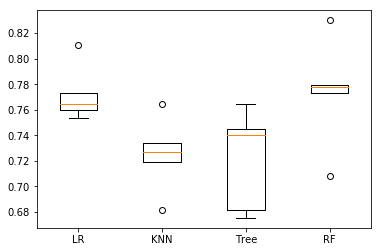

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()